### ML Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

- data__Îç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨ÌÜµÌï©.ipynb ÏïÑÎûò ÏΩîÎìúÏóêÏÑú Îã¥Îãπ Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Î≥ÄÍ≤ΩÏÇ¨Ìï≠ ÏûàÏùÑÏãú ÏàòÏ†ïÌï¥ÏÑú ÏÇ¨Ïö©

In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨
import os
import json
import pandas as pd
import numpy as np
from pathlib import Path

# ÌôòÍ≤ΩÏÑ§Ï†ï
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)      # Ìñâ Ï†ÑÏ≤¥ ÌëúÏãú
pd.set_option('display.max_columns', None)  # Ïó¥ Ï†ÑÏ≤¥ ÌëúÏãú
pd.set_option('display.width', None)        # Í∞ÄÎ°úÌè≠ ÏûêÎèô ÎßûÏ∂§
pd.set_option('display.max_colwidth', None) # ÏÖÄ ÏïàÏùò ÌÖçÏä§Ìä∏ ÏÉùÎûµ Î∞©ÏßÄ
pd.set_option('display.float_format', '{:.6f}'.format)

# Í≤ΩÎ°ú ÏÑ§Ï†ï
ROOT_DIR = Path("").resolve().parent.parent

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
DATA_DIR = ROOT_DIR / "data"
DATA_PATH = DATA_DIR / "analy_data.csv"
SAVE_FILE = "preprocessed_v1.csv"

# JSON Ïª¨Îüº Í¥ÄÎ¶¨ ÌååÏùº Î°úÎìú
with open("columns.json", "r", encoding="utf-8") as f:
    columns_dict = json.load(f)

# Í≥µÌÜµ Ìï®Ïàò 
def get_columns(*categories):
    """columns.jsonÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ use=y Ïª¨Îüº Ï∂îÏ∂ú"""
    selected = []
    for cat in categories:
        for col, meta in columns_dict[cat].items():
            if meta.get("use", "n") == "y": 
                selected.append(col)
    
    if "churn" not in selected:
        selected.append("churn")

    if "exmprs_no" not in selected:
        selected.append("exmprs_no")

    return selected

def rename_to_kor(df):
    """columns.jsonÏùò nameÏúºÎ°ú ÌïúÍ∏Ä Ïª¨ÎüºÎ™Ö Îß§Ìïë"""
    rename_map = {
        col: meta["name"]
        for cat in columns_dict.values()
        for col, meta in cat.items()
        if col in df.columns
    }
    return df.rename(columns=rename_map)

# 1. Í∏∞Î≥∏Ï†ïÎ≥¥ + Í∞ÄÍµ¨Ï°∞ÏÇ¨ 
def preprocess_basic_house(data_path):
    cols = get_columns("Í∏∞Î≥∏Ï†ïÎ≥¥", "Í∞ÄÍµ¨Ï°∞ÏÇ¨")
    df = pd.read_csv(data_path, usecols=cols)

    # 'b' Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨
    if "exmprs_no" in df.columns:
        df['exmprs_no'] = df['exmprs_no'].apply(lambda x: x.split("'")[1])

    if "CTPRVN_CODE" in df.columns:
        df['CTPRVN_CODE'] = df['CTPRVN_CODE'].apply(lambda x: x.split("'")[1])
    
    if "SPOT_NO" in df.columns:
        df['SPOT_NO'] = df['SPOT_NO'].apply(lambda x: x.split("'")[1])
    
    if "sex" in df.columns:
        df['sex'] = df['sex'].apply(lambda x: 1 if x == 1 else 2).astype(str)

    # NaN Î≥ÄÍ≤Ω
    for col in ["fma_04z1", "nue_01z1", "fma_27z1", "fma_26z1"]:
        if col in df.columns:
            df.loc[df[col] >= 7, col] = np.nan

    for col in ["fma_13z1", "fma_14z1"]:
        if col in df.columns:
            df.loc[df[col] >= 77777, col] = np.nan

    for col in ["fma_24z2"]:
            if col in df.columns:
                df.loc[df[col] >= 77, col] = np.nan

    return df

# 2. ÏãùÏÉùÌôú + ÎπÑÎßåÎ∞èÏ≤¥Ï§ëÏ°∞Ï†à + Íµ¨Í∞ïÍ±¥Í∞ï
def preprocess_diet_obesity_oral(data_path):
    cols = get_columns("ÏãùÏÉùÌôú", "ÎπÑÎßåÎ∞èÏ≤¥Ï§ëÏ°∞Ï†à", "Íµ¨Í∞ïÍ±¥Í∞ï")
    df = pd.read_csv(data_path, usecols=cols)

    # 'b' Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨
    if "exmprs_no" in df.columns:
        df['exmprs_no'] = df['exmprs_no'].apply(lambda x: x.split("'")[1])

    # NaN Î≥ÄÍ≤Ω
    for col in ["nua_01z2", "nuc_02z1", "nuc_03z1", "obb_02a1", "obb_02b1", "obb_02d1", "ora_01z1", "orb_01z1", "ord_01d2", "ord_05z1", "ord_01f3"]:
        if col in df.columns:
            df.loc[df[col] >= 7, col] = np.nan

    for col in ["ore_03z2"]:
            if col in df.columns:
                df.loc[df[col] >= 77, col] = np.nan

    return df

# 3. ÏùåÏ£º + Ïã†Ï≤¥ÌôúÎèô
def preprocess_drink_physical(data_path):
    cols = get_columns("ÏùåÏ£º", "Ïã†Ï≤¥ÌôúÎèô")
    df = pd.read_csv(data_path, usecols=cols)

    # 'b' Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨
    if "exmprs_no" in df.columns:
        df['exmprs_no'] = df['exmprs_no'].apply(lambda x: x.split("'")[1])

    # Í∞í Î≥ÄÍ≤Ω
    if "drb_01z3" in df.columns:
        df["drb_01z3"] = df["drb_01z3"].replace(8, 1)

    if "drb_03z1" in df.columns:
        df["drb_03z1"] = df["drb_03z1"].replace(8, -1)

    # NaN Î≥ÄÍ≤Ω 
    for col in ["drb_01z3", "drb_03z1", "drg_01z3", "pha_11z1", "drb_04z1", "drb_05z1"]:
        if col in df.columns:
            df.loc[df[col] >= 7, col] = np.nan

    for col in ["pha_04z1", "pha_07z1", "phb_01z1"]:
            if col in df.columns:
                df.loc[df[col] >= 77, col] = np.nan

    return df

# 4. Ï†ïÏã†Í±¥Í∞ï + Î≥¥Í±¥Ïù¥Ïö©
def preprocess_mental_health(data_path):
    cols = get_columns("Ï†ïÏã†Í±¥Í∞ï", "Î≥¥Í±¥Ïù¥Ïö©")
    df = pd.read_csv(data_path, usecols=cols)

    # 'b' Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨
    if "exmprs_no" in df.columns:
        df['exmprs_no'] = df['exmprs_no'].apply(lambda x: x.split("'")[1])

    # NaN Î≥ÄÍ≤Ω 
    for col in ["mta_01z1", "mta_02z1", "mtc_08z1", "mtc_12c1", "mtc_12h1", "mtj_05z2", "mtj_10z1", "mtj_11z1"]:
        if col in df.columns:
            df.loc[df[col] >= 7, col] = np.nan

    for col in ["edit_mtc_03z1"]:
            if col in df.columns:
                df.loc[df[col] >= 77, col] = np.nan

    return df


def feature_time_col(df_merge):
    # ÏãúÍ∞Ñ-Î∂Ñ Ïª¨Îüº Ïåç Ï†ïÏùò
    time_minute_pairs = [
        ('edit_mtc_03z1', 'mtc_04z1'),
        ('mtc_05z1', 'mtc_06z1'),
        ('mtc_08z1', 'mtc_09z1'),
        ('mtc_10z1', 'mtc_11z1')
    ]

    # Í∞Å ÏåçÏóê ÎåÄÌï¥ Î∂ÑÏùÑ ÏãúÍ∞ÑÏúºÎ°ú Î≥ÄÌôòÌï¥ ÎçîÌï®
    for time_col, minute_col in time_minute_pairs:
        # Î∂Ñ Ïª¨ÎüºÏù¥ Ï°¥Ïû¨Ìï† Í≤ΩÏö∞Îßå Ï≤òÎ¶¨
        if minute_col in df_merge.columns and time_col in df_merge.columns:
            df_merge[time_col] = df_merge[time_col].fillna(0) + (df_merge[minute_col].fillna(0) / 60)
    

    # 'Î∂Ñ' Ïª¨ÎüºÏùÄ ÏÇ≠Ï†ú
    df_merge = df_merge.drop(columns=[pair[1] for pair in time_minute_pairs if pair[1] in df_merge.columns])
    
    return df_merge





# 5. Í±¥Í∞ïÌñâÌÉú + ÍµêÏú°Î∞èÍ≤ΩÏ†úÌôúÎèô
def preprocess_behavior_education(data_path):
    cols = get_columns("Í±¥Í∞ïÌñâÌÉú", "ÍµêÏú°Î∞èÍ≤ΩÏ†úÌôúÎèô")
    df = pd.read_csv(data_path, usecols=cols)

    # 'b' Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨
    if "exmprs_no" in df.columns:
        df['exmprs_no'] = df['exmprs_no'].apply(lambda x: x.split("'")[1])

    # NaN Î≥ÄÍ≤Ω
    for col in ["smf_01z1", "sma_01z1", "sma_03z2", "smb_09z1", "sma_36z1", "sma_37z1", "sma_08z1", "sma_12z2"\
                "smd_02z3", "smd_01z3", "smc_08z2", "smc_09z2", "smc_10z2", "sob_02z1", "soa_01z1", "soa_07z1", "sod_02z3"]:
        if col in df.columns:
            df.loc[df[col] >= 7, col] = np.nan

    for col in ["smb_02z1", "smb_05z1", "sma_11z2", "sob_01z1", "soa_06z2", "smb_12z1"]:
            if col in df.columns:
                df.loc[df[col] >= 77, col] = np.nan

    for col in ["smb_13z1", "smb_03z1", "smb_04z1", "smb_06z1", "smb_11z1"]:
            if col in df.columns:
                df.loc[df[col] >= 777, col] = np.nan
    return df

df_basic = preprocess_basic_house(DATA_PATH)
df_health = preprocess_diet_obesity_oral(DATA_PATH)
df_drink = preprocess_drink_physical(DATA_PATH)
df_mental = preprocess_mental_health(DATA_PATH)
df_behavior = preprocess_behavior_education(DATA_PATH)

dfs = [df_basic, df_health, df_drink, df_mental, df_behavior]
df_merge = dfs[0]
for temp in dfs[1:]:
    join_cols = [c for c in ["exmprs_no", "churn"] if c in df_merge.columns and c in temp.columns]
    if join_cols:
        df_merge = pd.merge(df_merge, temp, on=join_cols, how="outer")

print("Ïª¨Îüº ÏãùÎ≥Ñ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", df_merge.shape,'-2')
print(f"Í≤∞Ï∏°Ïπò ÎπÑÏú®: (ÌèâÍ∑†) {df_merge.isna().mean().mean() * 100:.2f}%")

#=========================
# Ï∂îÍ∞Ä Ï†ÑÏ≤òÎ¶¨
#=========================
# doyeon
#=========================
# 'ÏõîÍ∞Ñ Ìè≠Ïùå Í≤ΩÌóò(ÎÇ®)', 'ÏõîÍ∞Ñ Ìè≠Ïùå Í≤ΩÌóò(Ïó¨)' ['drb_04z1', 'drb_05z1'] -> 'ÏõîÍ∞Ñ Ìè≠Ïùå Í≤ΩÌóò' ['drb_binge_monthly'] ÌÜµÌï©
df_merge['sex'] = df_merge['sex']
df_merge['drb_binge_monthly'] = np.where(df_merge['sex'] == 1, df_merge['drb_04z1'], df_merge['drb_05z1'])
df_merge.drop(['drb_04z1', 'drb_05z1'], axis=1, inplace=True)

# Í∞íÎ≥ÄÍ≤Ω
df_merge['drb_binge_monthly'] = df_merge['drb_binge_monthly'].replace(8, -1)
df_merge.loc[df_merge['drb_binge_monthly'] >= 7, 'drb_binge_monthly'] = np.nan

# Î≤îÏ£ºÌòï ÏπºÎüº objectÌòï Î≥ÄÌôò
df_merge['dra_01z1'] = df_merge['dra_01z1'].astype('object')

#=========================
# soso
#=========================
# Ïó∞Î†πÎåÄ
df_merge['age_group'] = (df_merge['age'] // 10) * 10

# 1Ïù∏Í∞ÄÍµ¨
df_merge['is_single'] = np.where((df_merge['mbhld_co'] <= 1), 1, 0)

# ÏõîÍ∞ÑÏÜåÎìù Í∏∞Ï§Ä Í∞ÄÍµ¨ÏÜåÎìùÏª¨Îüº ÌÜµÌï©
df_merge['fma_14z1_add'] = df_merge['fma_14z1'] 
df_merge['fma_14z1_add'] = round(df_merge['fma_14z1_add'].fillna(df_merge['fma_13z1'] / 12))
df_merge['fma_14z1_log'] = np.log1p(df_merge['fma_14z1_add'])

bins = [0, 50, 100, 200, 300, 400, 500, 600, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8]
df_merge['fma_14z1_group'] = pd.cut(df_merge['fma_14z1_add'], bins=bins, labels=labels, right=False)
df_merge['fma_14z1_group'] = np.where(df_merge['fma_14z1_group'].isna(), df_merge['fma_24z2'].astype(float), df_merge['fma_14z1_group'])

# ÏπòÎß§Í∞ÄÏ°±Ïó¨Î∂Ä
def get_dementia_case(row):
    if row['fma_27z1'] == 1 and row['fma_26z1'] == 1:
        return 1 # ÏπòÎß§Í∞ÄÏ°± ÏûàÏùå + Í∞ôÏù¥ Í±∞Ï£º
    elif row['fma_27z1'] == 1 and row['fma_26z1'] == 2:
        return 2 # ÏπòÎß§Í∞ÄÏ°± ÏûàÏùå + ÎπÑÍ±∞Ï£º
    elif row['fma_27z1'] == 2:
        return 3 # ÏπòÎß§Í∞ÄÏ°± ÏóÜÏùå
    else:
        return np.nan

df_merge['fma_dementia_case'] = df_merge.apply(get_dementia_case, axis=1)
df_merge.drop(['fma_13z1', 'fma_14z1','fma_27z1','fma_26z1'], axis=1, inplace=True)
print("Ï∂îÍ∞Ä Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", df_merge.shape ,'-2')
print("exmprs_no, wt_p ÌïÑÏöîÏãú ÌôúÏö©ÌïòÍ∏∞ ÏúÑÌï¥ Ìè¨Ìï®Ìï¥ÎÜìÏùå, Ï†úÏô∏ÌïòÍ≥† ÏÇ¨Ïö©")

NameError: name 'df' is not defined

In [ ]:
# ÌïúÍ∏ÄÏª¨ÎüºÏúºÎ°ú ÌôïÏù∏Ìï† Ïãú ÏÇ¨Ïö©
df_merge_kor = rename_to_kor(df_merge)

: 

---

### Î™®Îç∏Ïóê Îì§Ïñ¥Í∞ÄÎäî ÌîºÏ≤ò Ìï∏Îì§ÎßÅÌïòÍ≥† ÌÖåÏä§Ìä∏ Ìï¥Î≥¥Í∏∞ (Ìè¨Îß∑ Í≥†Ï†ï)

In [ ]:
# ÏúÑ ÏΩîÎìú Ïã§Ìñâ Í≤∞Í≥º: df_merge
df = df_merge.copy()
df = df.drop(['exmprs_no','wt_p'], axis=1)
df.head()

age sex CTPRVN_CODE SPOT_NO  mbhld_co  reside_adult_co  fma_04z1  \
0 31.000000   1          11   00102  1.000000         1.000000  3.000000   
1 37.000000   1          11   00102  3.000000         2.000000  3.000000   
2 36.000000   2          11   00102  3.000000         2.000000  3.000000   
3 36.000000   1          11   00102  2.000000         2.000000  3.000000   
4 64.000000   1          11   00191  1.000000         1.000000  1.000000   

   fma_24z2  nue_01z1  churn  nua_01z2  nuc_02z1  nuc_03z1  obb_02a1  \
0       NaN  1.000000      1  4.000000  2.000000       NaN  1.000000   
1       NaN  1.000000      0  2.000000  1.000000  1.000000       NaN   
2       NaN  1.000000      1  4.000000  2.000000       NaN  2.000000   
3       NaN  1.000000      0  4.000000  1.000000       NaN  1.000000   
4       NaN  4.000000      0  2.000000  2.000000       NaN       NaN   

   obb_02b1  obb_02d1  ora_01z1  orb_01z1  ord_01d2  ord_05z1  ord_01f3  \
0  2.000000  2.000000  3.000000  5.000000  1.000000       NaN  1.000000   
1       NaN       NaN  2.000000  5.000000  2.000000  1.000000  1.000000   
2  2.000000  2.000000  2.000000  5.000000  1.000000       NaN  1.000000   
3  2.000000  2.000000  4.000000  3.000000  2.000000  1.000000  1.000000   
4       NaN       NaN  2.000000  1.000000  1.000000       NaN  1.000000   

   ore_03z2 dra_01z1  drb_01z3  drb_03z1  drg_01z3  pha_04z1  pha_07z1  \
0       NaN 1.000000  5.000000  3.000000  1.000000  2.000000  2.000000   
1       NaN 1.000000  4.000000  4.000000  1.000000  3.000000  1.000000   
2       NaN 1.000000  5.000000  4.000000  2.000000  0.000000  4.000000   
3       NaN 1.000000  4.000000  4.000000  1.000000  0.000000  3.000000   
4  3.000000 1.000000  4.000000  5.000000  1.000000  0.000000  0.000000   

   phb_01z1  pha_11z1  mta_01z1  mta_02z1  edit_mtc_03z1  mtc_08z1  mtc_12c1  \
0  5.000000  3.000000  2.000000  2.000000       0.000000       NaN  4.000000   
1  7.000000  1.000000  4.000000       NaN       1.000000       NaN  1.000000   
2  7.000000  1.000000  2.000000  2.000000       1.000000       NaN  3.000000   
3  5.000000  1.000000  2.000000  2.000000       0.000000       NaN  1.000000   
4  0.000000  1.000000  1.000000  1.000000      22.000000  6.000000  4.000000   

   mtc_12h1  mtj_05z2  mtj_10z1  mtj_11z1  smf_01z1  sma_01z1   smb_01z1  \
0  2.000000       NaN       NaN       NaN  1.000000  1.000000 888.000000   
1  1.000000       NaN       NaN       NaN  1.000000  2.000000  15.000000   
2  1.000000       NaN       NaN       NaN  1.000000  2.000000 888.000000   
3  1.000000       NaN       NaN       NaN  1.000000  2.000000  10.000000   
4  1.000000  1.000000  2.000000  2.000000  1.000000  2.000000  10.000000   

   smb_02z1  smb_03z1  smb_04z1  smb_05z1  smb_06z1  smb_09z1  sma_36z1  \
0       NaN       NaN  2.000000  0.000000  1.000000  3.000000  2.000000   
1       NaN       NaN       NaN       NaN       NaN       NaN  2.000000   
2       NaN       NaN  5.000000  0.000000 10.000000  3.000000  2.000000   
3       NaN       NaN       NaN       NaN       NaN       NaN  2.000000   
4       NaN       NaN       NaN       NaN       NaN       NaN  2.000000   

   smb_11z1  smb_12z1  smb_13z1  sma_08z1  sma_11z2  smd_02z3  smd_01z3  \
0       NaN       NaN       NaN  2.000000       NaN  8.000000       NaN   
1       NaN       NaN       NaN  2.000000       NaN  2.000000  4.000000   
2       NaN       NaN       NaN  2.000000       NaN  8.000000       NaN   
3       NaN       NaN       NaN  2.000000       NaN  2.000000  2.000000   
4       NaN       NaN       NaN  2.000000       NaN  2.000000  4.000000   

   smc_08z2  smc_09z2  smc_10z2  sob_01z1  sob_02z1  soa_01z1  soa_06z2  \
0  2.000000       NaN  2.000000  7.000000  1.000000  1.000000  3.000000   
1  2.000000       NaN  2.000000  5.000000  1.000000  1.000000  4.000000   
2  2.000000       NaN  2.000000  6.000000  1.000000  1.000000  4.000000   
3  2.000000       NaN  2.000000  7.000000  1.000000  1.000000  3.000000   
4  2.00

: 

In [ ]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

: 

In [ ]:
# ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±

: 

In [ ]:
# Ïù∏ÏΩîÎî© 

: 

In [ ]:
df_merge['smb_02z1'].describe()

count   3590.000000
mean      12.403621
std        8.152560
min        1.000000
25%        5.000000
50%       10.000000
75%       17.750000
max       31.000000
Name: smb_02z1, dtype: float64

: 

In [ ]:
def feature_smoking_will(df):
    """
    Ìù°Ïó∞ÏùºÏàò(smb_02z1), Ìù°Ïó∞Îüâ(smb_03z1)ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÏßÑ Î≥ÄÏàò ÏÉùÏÑ±
    
    Í∑úÏπô:
    - Ìù°Ïó∞ÏùºÏàò: 10Ïùº Ïù¥Ìïò ‚Üí 0, 10Ïùº Ï¥àÍ≥º~30Ïùº Ïù¥Ìïò ‚Üí 1
    - Ìù°Ïó∞Îüâ: 10Í∞úÎπÑ Ïù¥Ìïò ‚Üí 0, 10Í∞úÎπÑ Ï¥àÍ≥º ‚Üí 1
    """

    df['smoking_days_bin'] = df['smb_02z1'].apply(lambda x: 0 if x <= 10 else 1)
    df['smoking_amt_bin'] = df['smb_03z1'].apply(lambda x: 0 if x <= 10 else 1)
    
    return df

feature_smoking_will(df)

age sex CTPRVN_CODE SPOT_NO  mbhld_co  reside_adult_co  fma_04z1  \
0     31.000000   1          11   00102  1.000000         1.000000  3.000000   
1     37.000000   1          11   00102  3.000000         2.000000  3.000000   
2     36.000000   2          11   00102  3.000000         2.000000  3.000000   
3     36.000000   1          11   00102  2.000000         2.000000  3.000000   
4     64.000000   1          11   00191  1.000000         1.000000  1.000000   
...         ...  ..         ...     ...       ...              ...       ...   
89817 49.000000   1          50   01711  1.000000         1.000000  3.000000   
89818 77.000000   1          50   01711  5.000000         5.000000  3.000000   
89819 64.000000   1          50   01711  3.000000         3.000000  3.000000   
89820 40.000000   1          50   01711  3.000000         3.000000  3.000000   
89821 39.000000   1          50   01711  2.000000         2.000000  3.000000   

       fma_24z2  nue_01z1  churn  nua_01z2  nuc_02z1  nuc_03z1  obb_02a1  \
0           NaN  1.000000      1  4.000000  2.000000       NaN  1.000000   
1           NaN  1.000000      0  2.000000  1.000000  1.000000       NaN   
2           NaN  1.000000      1  4.000000  2.000000       NaN  2.000000   
3           NaN  1.000000      0  4.000000  1.000000       NaN  1.000000   
4           NaN  4.000000      0  2.000000  2.000000       NaN       NaN   
...         ...       ...    ...       ...       ...       ...       ...   
89817       NaN  1.000000      1  4.000000  1.000000       NaN       NaN   
89818       NaN  1.000000      1  1.000000  1.000000       NaN       NaN   
89819       NaN  1.000000      1  1.000000  1.000000       NaN       NaN   
89820       NaN  1.000000      0  1.000000  2.000000       NaN  1.000000   
89821       NaN  1.000000      1  1.000000  1.000000  1.000000  1.000000   

       obb_02b1  obb_02d1  ora_01z1  orb_01z1  ord_01d2  ord_05z1  ord_01f3  \
0      2.000000  2.000000  3.000000  5.000000  1.000000       NaN  1.000000   
1           NaN       NaN  2.000000  5.000000  2.000000  1.000000  1.000000   
2      2.000000  2.000000  2.000000  5.000000  1.000000       NaN  1.000000   
3      2.000000  2.000000  4.000000  3.000000  2.000000  1.000000  1.000000   
4           NaN       NaN  2.000000  1.000000  1.000000       NaN  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
89817       NaN       NaN  4.000000  3.000000  1.000000       NaN  1.000000   
89818       NaN       NaN  3.000000  5.000000  1.000000       NaN  1.000000   
89819       NaN       NaN  2.000000  4.000000  1.000000       NaN  1.000000   
89820  1.000000  2.000000  3.000000  5.000000  2.000000  2.000000  1.000000   
89821  2.000000  2.000000  2.000000  5.000000  1.000000       NaN  1.000000   

       ore_03z2 dra_01z1  drb_01z3  drb_03z1  drg_01z3  pha_04z1  pha_07z1  \
0           NaN 1.000000  5.000000  3.000000  1.000000  2.000000  2.000000   
1           NaN 1.000000  4.000000  4.000000  1.000000  3.000000  1.000000   
2           NaN 1.000000  5.000000  4.000000  2.000000  0.000000  4.000000   
3           NaN 1.000000  4.000000  4.000000  1.000000  0.000000  3.000000   
4      3.000000 1.000000  4.000000  5.000000  1.000000  0.000000  0.000000   
...         ...      ...       ...       ...       ...       ...       ...   
89817       NaN 1.000000  4.000000  1.000000  1.000000  1.000000  5.000000   
89818       NaN 1.000000  1.000000 -1.000000       NaN  0.000000  3.000000   
89819       NaN 1.000000  5.000000  1.000000  1.000000  6.000000  6.000000   
89820       NaN 1.000000  4.000000  4.000000  2.000000  4.000000  4.000000   
89821       NaN 1.000000  2.000000  1.000000  5.000000  3.000000  3.000000   

       phb_01z1  pha_11z1  mta_01z1  mta_02z1  edit_mtc_03z1  mtc_08z1  \
0      5.000000  3.000000  2.000000  2.000000       0.000000       NaN   
1      7.000000  1.000000  4.000000       NaN       1.000000       NaN   
2      7.000000  1.000000  2.0

: 

In [ ]:
# ÏµúÏ¢Ö ÌîºÏ≤ò ÏÑ†ÌÉù (ÏòàÏãú)
fnl_col = ['age', 'sex', 'CTPRVN_CODE', 'SPOT_NO', 'mbhld_co', 'reside_adult_co',
       'fma_04z1', 'fma_24z2', 'nue_01z1', 'churn', 'nua_01z2', 'nuc_02z1',
       'nuc_03z1', 'obb_02a1', 'obb_02b1', 'obb_02d1', 'ora_01z1', 'orb_01z1',
       'ord_01d2', 'ord_05z1', 'ord_01f3', 'ore_03z2', 'dra_01z1', 'drb_01z3',
       'drb_03z1', 'drg_01z3', 'pha_04z1', 'pha_07z1', 'phb_01z1', 'pha_11z1',
       'mta_01z1', 'mta_02z1', 'edit_mtc_03z1', 'mtc_08z1', 'mtc_12c1',
       'mtc_12h1', 'mtj_05z2', 'mtj_10z1', 'mtj_11z1',
       'sob_01z1', 'sob_02z1', 'soa_01z1', 'smoking_days_bin', 'smoking_amt_bin',
       'soa_06z2', 'soa_07z1', 'sod_02z3', 'drb_binge_monthly', 'age_group',
       'is_single', 'fma_14z1_add', 'fma_14z1_log', 'fma_14z1_group',
       'fma_dementia_case']

# Ï†úÍ±∞ Ïª¨Îüº(Ìù°Ïó∞): 'smf_01z1', 'sma_01z1', 'smb_01z1' , 'smb_04z1',
# 'smb_05z1', 'smb_06z1', 'sma_36z1', 'sma_08z1', 'sma_11z2', 
# Í∞ÑÏ†ëÌù°Ïó∞: 'smc_08z2','smc_09z2', 'smc_10z2'
# ['sma_03z2', 'sma_37z1', 'sma_12z2'] -> ÌÉÄÍ≤üÎ≥ÄÏàò ÎßåÎì† Î≥ÄÏàò
# ['smd_02z3','smd_01z3', 'smb_11z1',  'sma_01z1', ...] Ï†úÏô∏ -> ÏòàÏ∏°ÌïòÍ≥†Ïûê ÌïòÎäî ÌÉÄÍ≤üÏùò Ï†ïÎ≥¥Î•º Í∞ÄÏßÄÍ≥†ÏûàÎäî Î≥ÄÏàò

# ÏùòÏßÄ Í¥ÄÎ†® Ïª¨Îüº
# Í∞ÄÎÅî Ìù°Ïó∞Ïûê Ìù°Ïó∞ÏùºÏàò: 'smb_02z1' -> 0-9ÏùºÏùÄ ÎÅäÏúºÎ†§Îäî ÏùòÏßÄÍ∞Ä Î≥¥ÏûÑ
# Í∞ÄÎÅî Ìù°Ïó∞Ïûê Ìù°Ïó∞Îüâ: 'smb_03z1' -> 10Í∞úÎπÑÍπåÏßÄÎäî ÎÅäÏúºÎ†§Îäî ÏùòÏßÄÍ∞Ä ÏûàÏùå
# Í∏àÏó∞ Ïú†ÏßÄ Í∏∞Í∞Ñ: 'smb_09z1' -> Ï†úÍ±∞
# Í∂åÎ†®Ìòï Í∞ÄÎÅî ÏÇ¨Ïö©Ïûê ÏõîÍ∞ÑÏùºÏàò: 'smb_12z1' -> Ï†úÍ±∞
# Í∂åÎ†®Ìòï Í∞ÄÎÅî ÏÇ¨Ïö©Ïûê ÏùºÌèâÍ∑†: 'smb_13z1' -> Ï†úÍ±∞

# def feature_smoking_will(df):
#     """
#     Ìù°Ïó∞ÏùºÏàò(smb_02z1), Ìù°Ïó∞Îüâ(smb_03z1)ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÏßÑ Î≥ÄÏàò ÏÉùÏÑ±
    
#     Í∑úÏπô:
#     - Ìù°Ïó∞ÏùºÏàò: 10Ïùº Ïù¥Ìïò ‚Üí 0, 10Ïùº Ï¥àÍ≥º~30Ïùº Ïù¥Ìïò ‚Üí 1
#     - Ìù°Ïó∞Îüâ: 10Í∞úÎπÑ Ïù¥Ìïò ‚Üí 0, 10Í∞úÎπÑ Ï¥àÍ≥º ‚Üí 1
#     """

#     df['smoking_days_bin'] = df['smb_02z1'].apply(lambda x: 0 if x <= 10 else 1)
#     df['smoking_amt_bin'] = df['smb_03z1'].apply(lambda x: 0 if x <= 10 else 1)
    
#     return df
    
df = df[fnl_col]

: 

In [ ]:
# Î™®Îç∏
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# df = df_merge.copy()

X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, '\n')

# Î™®Îç∏ ÌïôÏäµ
model = DecisionTreeClassifier(random_state=2)
model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Î≥ÄÏàòÏ§ëÏöîÎèÑ
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False), '\n')

# ÌòºÎèôÌñâÎ†¨
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# PR-AUC
pr_auc = average_precision_score(y_test, y_prob)
prec, recall, _ = precision_recall_curve(y_test, y_prob)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
axes[0].plot([0,1],[0,1],'--')
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TPR")
axes[0].set_title("ROC Curve")
axes[0].legend()

axes[1].plot(recall, prec, label=f"PR-AUC = {pr_auc:.3f}")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve")
axes[1].legend()

plt.tight_layout()
plt.show()

(71857, 53) (71857,) (17965, 53) (17965,) 

Accuracy: 0.613247982187587
age                 0.125581
SPOT_NO             0.082591
CTPRVN_CODE         0.045262
smoking_amt_bin     0.041624
soa_06z2            0.037571
fma_14z1_add        0.033092
fma_14z1_log        0.032511
edit_mtc_03z1       0.031598
mtc_08z1            0.029299
phb_01z1            0.028321
sod_02z3            0.025445
sob_01z1            0.025246
drb_01z3            0.023933
drb_03z1            0.023728
orb_01z1            0.023176
pha_07z1            0.021723
ord_05z1            0.021384
ora_01z1            0.021302
mtc_12c1            0.021160
pha_11z1            0.019756
pha_04z1            0.019745
nua_01z2            0.019649
mta_01z1            0.018166
obb_02a1            0.017971
age_group           0.015886
mbhld_co            0.015767
drg_01z3            0.014628
reside_adult_co     0.011539
ore_03z2            0.011135
soa_07z1            0.011106
fma_14z1_group      0.010232
nue_01z1            0.010182


: 

In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# df = pd.read_csv(DATA_PATH)
# Ïù¥ÎØ∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÏùòÎê®

# 2. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
# print("Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:")
# print(df.head(), "\n")


# Î¨∏ÏûêÏó¥ Ï†ÑÏ≤òÎ¶¨: b'2024' ‚Üí 2024 ÌòïÌÉúÎ°ú Î≥ÄÌôò
# df = df.applymap(lambda x: str(x).replace("b'", "").replace("'", "") if isinstance(x, str) else x)

# Î™®Îì† Ïª¨ÎüºÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (Î≥ÄÌôò Î∂àÍ∞ÄÌïú Í±¥ NaN)
# df = df.apply(pd.to_numeric, errors='coerce')


# 3. ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y) Î∂ÑÎ¶¨
# üîπ ÎßàÏßÄÎßâ Ïª¨ÎüºÏù¥ ÌÉÄÍπÉ(y)Ïù¥ÎùºÍ≥† Í∞ÄÏ†ïÌï©ÎãàÎã§. ÎßåÏïΩ Îã§Î•¥Î©¥ ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

# 4. ÌïôÏäµÏö©/ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 5. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ
rf_clf = RandomForestClassifier(
    random_state=2, 
    n_estimators=300,
    max_depth=7,
    min_samples_split=5,                            )
rf_clf.fit(X_train, y_train)

# 6. ÏòàÏ∏°
y_pred = rf_clf.predict(X_test)

# 7. ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 8. Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ RandomForestClassifier ÌèâÍ∞Ä Í≤∞Í≥º")

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print("\nÏÑ∏Î∂Ä Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:")
print(classification_report(y_test, y_pred))


NameError: name 'X_train' is not defined

: 

Confusion matrix (counts):
 [[7574  548]
 [  20 9823]]
Total samples = 17965, errors = 568


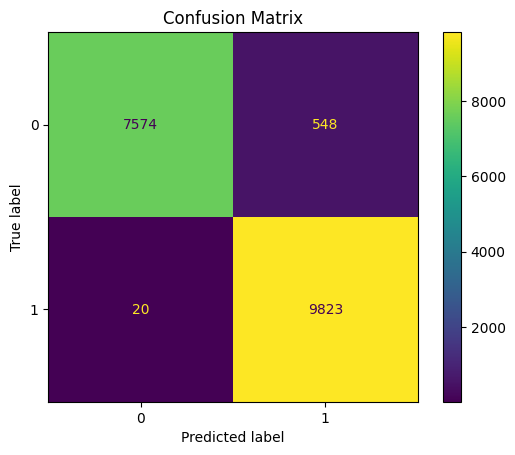

: 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# ÌòºÎèôÌñâÎ†¨
cm = confusion_matrix(y_test, y_pred)   # y_test, y_predÎäî Ïù¥ÎØ∏ ÏûàÎäî Î≥ÄÏàò
print("Confusion matrix (counts):\n", cm)
total = cm.sum()
errors = total - np.trace(cm)
print(f"Total samples = {total}, errors = {errors}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Ïò§Î∂ÑÎ•ò ÏÉòÌîåÌôïÏù∏
test_df = X_test.copy()
test_df['y_true'] = y_test
test_df['y_pred'] = y_pred
mis = test_df[test_df['y_true'] != test_df['y_pred']]
print("Ïò§Î∂ÑÎ•ò Ïàò:", len(mis))
display(mis.head(20))   # ÏûòÎ™ª Î∂ÑÎ•òÎêú ÏÉòÌîåÏùÑ ÏßÅÏ†ë ÌôïÏù∏


Ïò§Î∂ÑÎ•ò Ïàò: 568


age sex CTPRVN_CODE SPOT_NO  mbhld_co  reside_adult_co  fma_04z1  \
30686 48.000000   1          41   04022  1.000000         1.000000  3.000000   
72049 26.000000   1          46   00191  3.000000         2.000000  3.000000   
57850 40.000000   1          44   18492  3.000000         2.000000  3.000000   
70746 40.000000   1          46   00102  3.000000         2.000000  3.000000   
41028 43.000000   1          41   17372  4.000000         2.000000  3.000000   
44915 37.000000   1          42   00712  3.000000         2.000000  3.000000   
2099  41.000000   1          11   09121  3.000000         3.000000  3.000000   
21745 30.000000   2          29   18172  2.000000         2.000000  3.000000   
30007 53.000000   1          41   07062  4.000000         4.000000  3.000000   
5248  28.000000   1          11   00471  1.000000         1.000000  3.000000   
29519 50.000000   1          41   02342  3.000000         3.000000  3.000000   
509   36.000000   1          11   30062  2.000000         2.000000  3.000000   
41902 32.000000   1          41   14552  1.000000         1.000000  3.000000   
20163 52.000000   1          28   18712  1.000000         1.000000  3.000000   
10026 50.000000   1          26   02912  3.000000         2.000000  3.000000   
35063 27.000000   1          41   19261  1.000000         1.000000  3.000000   
15820 26.000000   1          27   17741  5.000000         5.000000  3.000000   
34864 44.000000   1          41   07212  1.000000         1.000000  3.000000   
29591 37.000000   2          41   07762  1.000000         1.000000  3.000000   
77806 33.000000   1          47   21992  2.000000         2.000000  3.000000   

       fma_24z2  nue_01z1  nua_01z2  nuc_02z1  nuc_03z1  obb_02a1  obb_02b1  \
30686       NaN  1.000000  4.000000  1.000000  1.000000  1.000000  2.000000   
72049       NaN  1.000000  4.000000  1.000000  2.000000  1.000000  2.000000   
57850       NaN  2.000000  1.000000  2.000000       NaN  1.000000  2.000000   
70746       NaN  1.000000  3.000000  1.000000       NaN  1.000000  2.000000   
41028       NaN  1.000000  4.000000  2.000000       NaN  2.000000  2.000000   
44915       NaN  1.000000  4.000000  1.000000       NaN       NaN       NaN   
2099        NaN  1.000000  4.000000  2.000000       NaN  1.000000  2.000000   
21745       NaN  1.000000  1.000000  1.000000       NaN  1.000000  2.000000   
30007       NaN  1.000000  4.000000  1.000000  2.000000  1.000000  2.000000   
5248        NaN  1.000000  1.000000  2.000000       NaN  1.000000  2.000000   
29519       NaN  1.000000  1.000000  1.000000       NaN  1.000000  2.000000   
509         NaN  1.000000  3.000000  1.000000  1.000000       NaN       NaN   
41902       NaN  1.000000  2.000000  1.000000       NaN       NaN       NaN   
20163       NaN  1.000000  4.000000  1.000000  1.000000       NaN       NaN   
10026       NaN  1.000000  4.000000  2.000000       NaN  1.000000  2.000000   
35063       NaN  1.000000  1.000000  1.000000       NaN       NaN       NaN   
15820       NaN  1.000000  4.000000  1.000000  1.000000  1.000000  2.000000   
34864       NaN  2.000000  4.000000  1.000000       NaN  1.000000  2.000000   
29591       NaN  1.000000  4.000000  1.000000  1.000000  1.000000  2.000000   
77806       NaN  1.000000  1.000000  1.000000       NaN  1.000000  2.000000   

       obb_02d1  ora_01z1  orb_01z1  ord_01d2  ord_05z1  ord_01f3  ore_03z2  \
30686  2.000000  3.000000  5.000000  3.000000       NaN  1.000000       NaN   
72049  2.000000  3.000000  5.000000  2.000000  4.000000  1.000000       NaN   
57850  2.000000  1.000000  5.000000  1.000000       NaN  2.000000       NaN   
70746  2.000000  3.000000  5.000000  2.000000  1.000000  1.000000       NaN   
41028  2.000000  4.000000  4.000000  2.000000  2.000000  1.000000       NaN   
44915       NaN  4.000000  3.000000  1.000000       NaN  1.000000       NaN   
2099   2.000000  3.000000  4.000000  3.000000       NaN  1.000000       NaN   
21745  2.000000  3.000000  2.000000  1.

: 

In [ ]:
# train, test Ï§ëÎ≥µÏó¨Î∂Ä ÌôïÏù∏
# Î∞©Î≤ï A: Ïù∏Îç±Ïä§ Í≤πÏπ® Í≤ÄÏÇ¨ (Í∞ÑÎã®)
common_idx = set(X_train.index).intersection(set(X_test.index))
print("Í∞ôÏùÄ Ïù∏Îç±Ïä§Í∞Ä train/testÏóê ÏûàÎäî Í≤ΩÏö∞ Ïàò:", len(common_idx))

# Î∞©Î≤ï B: Í∞í ÏûêÏ≤¥Í∞Ä ÎèôÏùºÌïú ÌñâÏù¥ trainÍ≥º testÏóê ÏûàÎäîÏßÄ (Î™®Îì† feature Í∏∞Ï§Ä merge)
common = pd.merge(X_test.reset_index(), X_train.reset_index(), on=list(X.columns), how='inner')
print("trainÍ≥º testÏóê ÎèôÏùºÌïú feature Í∞íÏùÑ Í∞ÄÏßÑ Ìñâ Ïàò (ÏôÑÏ†Ñ Ï§ëÎ≥µ):", common.shape[0])


Í∞ôÏùÄ Ïù∏Îç±Ïä§Í∞Ä train/testÏóê ÏûàÎäî Í≤ΩÏö∞ Ïàò: 0
trainÍ≥º testÏóê ÎèôÏùºÌïú feature Í∞íÏùÑ Í∞ÄÏßÑ Ìñâ Ïàò (ÏôÑÏ†Ñ Ï§ëÎ≥µ): 0


: 

In [ ]:
# targetÍ≥º Í∞ïÌïú ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑ featureÌôïÏù∏
df_all = pd.concat([X, y.rename('target')], axis=1)
corrs = df_all.corr()['target'].abs().sort_values(ascending=False)
print(corrs.head(20))   # ÌÉÄÍπÉÍ≥º Ï†àÎåÄ ÏÉÅÍ¥ÄÎèÑÍ∞Ä ÎÜíÏùÄ ÌîºÏ≤ò ÌôïÏù∏


target              1.000000
age                 0.292371
age_group           0.288582
smb_09z1            0.285593
nua_01z2            0.236455
sod_02z3            0.220702
drb_03z1            0.209135
mtc_12c1            0.171120
drb_01z3            0.150691
mtj_11z1            0.145926
edit_mtc_03z1       0.135595
mta_01z1            0.135381
drb_binge_monthly   0.128451
soa_01z1            0.123676
is_single           0.103621
ord_05z1            0.093057
obb_02a1            0.082489
sob_01z1            0.075147
obb_02b1            0.069053
fma_14z1_group      0.066784
Name: target, dtype: float64


: 

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# ÍµêÏ∞®Í≤ÄÏ¶ù
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
clf = RandomForestClassifier(random_state=2)
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
print("5-fold CV accuracies:", scores)
print("CV mean:", scores.mean(), "std:", scores.std())
# ÎûúÎç§ÌïòÍ≤å ÎÇòÎàà Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎèÑ ÎπÑÏä∑Ìïú Í≤∞Í≥ºÎ•º ÎÇº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå


5-fold CV accuracies: [0.97072085 0.96654606 0.97005121 0.96960588 0.96765754]
CV mean: 0.9689163074269886 std: 0.0015634862622245108


: 

In [ ]:
# feature_importances_
importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(20))

# permutation importance (Îçî Ïã†Î¢∞ÏÑ± ÏûàÎäî Î∞©Î≤ï)
from sklearn.inspection import permutation_importance
res = permutation_importance(rf_clf, X_test, y_test, n_repeats=10, random_state=2, n_jobs=-1)
perm_imp = pd.Series(res.importances_mean, index=X.columns).sort_values(ascending=False)
print(perm_imp.head(20))


smb_09z1        0.771341
age             0.029751
age_group       0.028821
smb_03z1        0.022634
smb_02z1        0.019725
sod_02z3        0.015222
nua_01z2        0.014476
drb_03z1        0.014105
smb_13z1        0.008662
smb_12z1        0.007935
mtj_11z1        0.006512
obb_02a1        0.004215
soa_06z2        0.003731
sob_01z1        0.003710
drb_01z3        0.003255
obb_02b1        0.003162
obb_02d1        0.002824
mtc_12c1        0.002730
edit_mtc_03z1   0.002485
drg_01z3        0.001751
dtype: float64
smb_09z1      0.425700
smb_13z1      0.003073
smb_12z1      0.001419
smb_02z1      0.000106
smb_03z1      0.000072
age           0.000000
CTPRVN_CODE   0.000000
sex           0.000000
ore_03z2      0.000000
nuc_02z1      0.000000
nuc_03z1      0.000000
obb_02a1      0.000000
obb_02d1      0.000000
obb_02b1      0.000000
ora_01z1      0.000000
orb_01z1      0.000000
drb_01z3      0.000000
ord_01d2      0.000000
ord_05z1      0.000000
SPOT_NO       0.000000
dtype: float64


: 

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
# ROC-AUC
y_prob = rf_clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)
# ROC-AUC = 1Ïóê Îß§Ïö∞ Í∑ºÏ†ë


ROC AUC: 0.9903359748794812


: 